In [4]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import os
import alpaca_trade_api as tradeapi

In [5]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iexfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [6]:
from dotenv import load_dotenv
load_dotenv()
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [7]:
list_of_tickers = ["SPY", "AGG"]
# YOUR CODE HERE
tickers = ["SPY", "AGG"]
timeframe = '1D'
end_date = datetime.now()
start_date = end_date + timedelta(-365)
# YOUR CODE HERE
df = api.get_barset(
    tickers,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df
df.head()

AGG                                        \
                             open      high      low     close   volume   
time                                                                      
2019-11-15 00:00:00-05:00  112.46  112.4600  112.380  112.4100  3961721   
2019-11-18 00:00:00-05:00  112.56  112.6460  112.520  112.5950  5550696   
2019-11-19 00:00:00-05:00  112.63  112.7600  112.600  112.7100  2181200   
2019-11-20 00:00:00-05:00  112.83  112.9800  112.805  112.9700  3218845   
2019-11-21 00:00:00-05:00  112.80  112.8859  112.720  112.8131  3971410   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2019-11-15 00:00:00-05:00  311.02  311.83  310.26  311.82  42549412  
2019-11-18 00:00:00-05:00  311.53  312.28  311.03  312.00  40559312  
2019-11-19 00:00:00-05:00  312.68  312.69  311.22  311.91  56892505  
2019-11-20 00:00:00-05:00  311.28  311.85  309.06  310.79  62833225  
2019-11-21 00:00:00-05:00  310.89  311.01  309.39  310.29  42497606

# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 500 iterations and generate at least 30 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 30 years

In [56]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE
ROI = df.pct_change().dropna()
dayAGG = ROI.mean()['AGG']['close']
daySPY = ROI.mean()['SPY']['close']

In [57]:
# Calculate volatility
# YOUR CODE HERE
STD_AGG = ROI.std()['AGG']['close']
STD_SPY = ROI.std()['SPY']['close']

In [58]:
# Save the last day's closing price
# YOUR CODE HERE
updatedAGG = df['AGG']['close'][-1]
updatedSPY = df['SPY']['close'][-1]

In [59]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252 * 30
monte_carlo = pd.DataFrame()
portolio_returns = pd.DataFrame()
weight = [0.6,0.4]

In [62]:
# Run the Monte Carlo Simulation
for x in range (number_simulations):
    
    # YOUR CODE HERE
    updatedagg = [updatedAGG]
    updatedspy = [updatedSPY]
    
    for i in range(number_records):
        AGG_simulated_price = updatedagg[-1] * (1 + np.random.normal(dayAGG, STD_AGG))
        updatedagg.append(AGG_simulated_price)
        SPY_simulated_price = updatedspy[-1] * (1 + np.random.normal(daySPY, STD_SPY))
        updatedspy.append(SPY_simulated_price)
        
        
    monte_carlo['AGG prices'] = pd.Series(updatedagg)
    monte_carlo['SPY prices'] = pd.Series(updatedspy)
    
    monte_carlo_daily_roi = monte_carlo.pct_change()
    weight = [0.60, 0.40]
    
    portolio_monte_carlo_daily_roi = monte_carlo_daily_roi.dot(weight)
    
    portolio_returns[x] = (1 + portolio_monte_carlo_daily_roi.fillna(0)).cumprod()
portolio_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.980834,0.993012,0.982866,0.991870,0.995711,0.995380,0.964062,0.981209,1.000686,1.008546,...,0.991024,0.986288,1.004578,1.015756,1.007724,0.985544,0.989636,0.987581,1.009818,0.990792
2,0.977342,1.000907,0.977348,0.991640,1.012165,1.008015,0.972039,0.945982,0.986639,1.002906,...,0.997366,0.985982,0.993248,1.011297,0.997409,0.972690,0.998795,0.965583,1.012972,1.002221
3,0.993019,0.992927,0.981907,0.981771,0.999407,0.994131,0.981039,0.964750,0.980985,0.982047,...,1.007474,0.999520,0.982346,0.999531,0.990033,0.979383,0.998626,0.967142,1.010260,1.006040
4,1.003155,1.009087,0.974901,0.984387,1.006628,1.018064,0.973257,0.963941,0.977470,0.988865,...,1.010203,1.016964,0.961619,1.017204,1.007941,0.986507,1.006834,0.933482,1.027997,1.016752


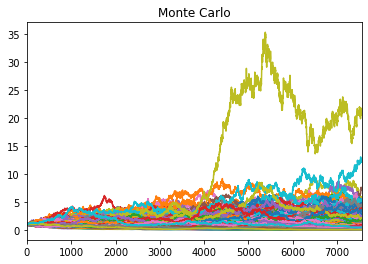

In [76]:
# Visualize the Simulation
# YOUR CODE HERE
portolio_returns.plot(legend=None, title="Monte Carlo")

In [77]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
# YOUR CODE HERE
P_returns = portolio_returns.iloc[-1, :]
P_returns.head()

0    0.377794
1    0.923267
2    0.118672
3    0.222187
4    0.656399
Name: 7560, dtype: float64

In [78]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
# YOUR CODE HERE
twenty_monte_cum_returns = portolio_returns.iloc[5040, :]
twenty_monte_cum_returns.head()

0    1.601232
1    1.096212
2    0.261664
3    0.198302
4    0.797550
Name: 5040, dtype: float64

In [81]:
# Display the 90% confidence interval for the ending returns
# YOUR CODE HERE
confidence_interval = P_returns.quantile(q=[0.05, 0.95])
confidence_interval

0.05    0.060472
0.95    3.266758
Name: 7560, dtype: float64

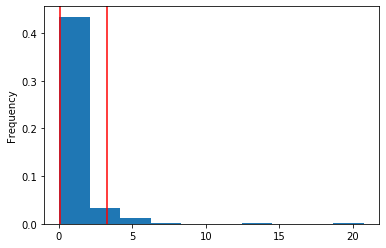

In [82]:
# Visualize the distribution of the ending returns
# YOUR CODE HERE
P_returns.plot(kind='hist', bins=10, density=True)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [86]:
# YOUR CODE HERE
print(f"Forecasted return at 30 years for the 10th % is {round(np.percentile(P_returns,10),2)}.")
print(f"Forecasted return at 30 years for the 10th % is {round(np.percentile(P_returns,50),2)}.")
print(f"Forecasted return at 30 years for the 10th % is {round(np.percentile(P_returns,90),2)}.")

Forecasted return at 30 years for the 10th % is 0.11.
Forecasted return at 30 years for the 10th % is 0.5.
Forecasted return at 30 years for the 10th % is 2.09.


### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [88]:
# YOUR CODE HERE
initial_investment = 20000
cumulative_pnl = initial_investment * P_returns
print(f"Forecasted return at 30 years for the 10th % is ${round(np.percentile(cumulative_pnl,10),2)}.")
print(f"Forecasted return at 30 years for the 10th % is ${round(np.percentile(cumulative_pnl,50),2)}.")
print(f"Forecasted return at 30 years for the 10th % is ${round(np.percentile(cumulative_pnl,90),2)}.")

Forecasted return at 30 years for the 10th % is $2131.11.
Forecasted return at 30 years for the 10th % is $10002.11.
Forecasted return at 30 years for the 10th % is $41798.82.


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [89]:
# YOUR CODE HERE
withdraw = 0.04*(round(np.percentile(cumulative_pnl,10),2))
projected_yearly_income=7389
if withdraw >= projected_yearly_income:
    print("4% withdraw is sufficient to cover the projected annual income")
else:
    print("4% withdraw is not sufficient to cover the projected annual income")

4% withdraw is not sufficient to cover the projected annual income


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [91]:
# YOUR CODE HERE
initial_investment_2 = 1.5*initial_investment
cumulative_pnl_2 = initial_investment_2 * P_returns
withdraw_2 = 0.04*(round(np.percentile(cumulative_pnl_2,10),2))
projected_yearly_income=7389



if withdraw_2 >= projected_yearly_income:
    print("4% withdraw is sufficient to cover the projected annual income")
    
else:
    print("4% withdraw is not sufficient to cover the projected annual income")

4% withdraw is not sufficient to cover the projected annual income


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE